In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
data = pd.read_excel('Online Retail.xlsx')


In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
data['Description']=data['Description'].fillna('Missing')

In [15]:
data.dropna(axis=0,how = 'any',inplace = True)


In [16]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [21]:
# Convert the datetime values to "Month Year" format
data['month_year']=data['InvoiceDate']
data['month_year'] = data['InvoiceDate'].dt.to_period('M')

In [22]:
data['diff'] = max(data['InvoiceDate']) - data['InvoiceDate']
recency = data.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [23]:
recency['diff'] = recency['diff'].dt.days

In [24]:
recency.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [25]:
recency.tail()

,CustomerID,diff
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3
4371,18287.0,42


In [26]:
frequency = data.groupby('CustomerID')['InvoiceDate'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [27]:
data['Amount'] = data['Quantity']*data['UnitPrice']
monetary = data.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.tail()

,CustomerID,Amount
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53
4371,18287.0,1837.28


In [28]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,diff,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,373 days 04:24:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,373 days 04:24:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,373 days 04:24:00,20.34


In [29]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,diff,Amount
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,0 days,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,0 days,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,0 days,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,0 days,14.85


In [30]:
rfm = pd.merge(recency, frequency, on='CustomerID', how='inner')

In [31]:
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')

In [32]:
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

In [33]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [54]:
rfm['Recency_labels']=pd.cut(rfm['Recency'], bins=5,labels=['newest','newer','medium','older','oldest'])

In [55]:
rfm['Frequency_labels']=pd.cut(rfm['Frequency'], bins=5,labels=['less','lesser','medium','high','more'])

In [56]:
rfm['Monetary_labels']=pd.cut(rfm['Monetary'], bins=4,labels=['lowest','lower','average','high'])

In [57]:
rfm['RFM_segment']=rfm['Recency_labels'].astype(str)+rfm['Frequency_labels'].astype(str)+rfm['Monetary_labels'].astype(str)


In [58]:
recency_dict = {'newest':5,'newer':4,'medium':3,'older':2,'oldest':1}

In [59]:
frequency_dict = {'more':5,'high':4,'medium':3,'lesser':2,'less':1}

In [60]:
monetary_dict = {'high':4,'average':3,'lower':2,'lowest':1}

In [64]:
rfm['RFM_score'] = rfm['Recency_labels'].map(recency_dict).astype(int)+rfm['Frequency_labels'].map(frequency_dict).astype(int)+rfm['Frequency_labels'].map(frequency_dict).astype(int)

In [65]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_labels,Frequency_labels,Monetary_labels,RFM_segment,RFM_score
0,12346.0,325,2,0.00,oldest,less,lowest,oldestlesslowest,3
1,12347.0,1,182,4310.00,newest,less,lowest,newestlesslowest,7
2,12348.0,74,31,1797.24,newest,less,lowest,newestlesslowest,7
3,12349.0,18,73,1757.55,newest,less,lowest,newestlesslowest,7
4,12350.0,309,17,334.40,oldest,less,lowest,oldestlesslowest,3


In [66]:
rfm['RFM_score'].unique()

array([ 3,  7,  5,  4,  6, 11,  9, 13, 15])

In [71]:
import numpy as np

# Assuming you have an existing DataFrame named 'rfm' with an 'RFM_score' column
rfm["customer_segment"] = np.select(
    [rfm['RFM_score'] > 10, (10 >= rfm['RFM_score']) & (rfm['RFM_score'] >= 5), rfm['RFM_score'] < 5],
    ["Top Customers", "Medium Value Customer", "Low Value Customer"],
    default="Unknown"
)


In [72]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_labels,Frequency_labels,Monetary_labels,RFM_segment,RFM_score,customer_segment
0,12346.0,325,2,0.00,oldest,less,lowest,oldestlesslowest,3,Low Value Customer
1,12347.0,1,182,4310.00,newest,less,lowest,newestlesslowest,7,Medium Value Customer
2,12348.0,74,31,1797.24,newest,less,lowest,newestlesslowest,7,Medium Value Customer
3,12349.0,18,73,1757.55,newest,less,lowest,newestlesslowest,7,Medium Value Customer
4,12350.0,309,17,334.40,oldest,less,lowest,oldestlesslowest,3,Low Value Customer
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,180.60,older,less,lowest,olderlesslowest,4,Low Value Customer
4368,18281.0,180,7,80.82,medium,less,lowest,mediumlesslowest,5,Medium Value Customer
4369,18282.0,7,13,176.60,newest,less,lowest,newestlesslowest,7,Medium Value Customer
4370,18283.0,3,721,2045.53,newest,less,lowest,newestlesslowest,7,Medium Value Customer


In [74]:
# rfm["customer_segment"] = ((np.where(rfm['RFM_score']>10,"Top Customers")),(np.where(10>rfm['RFM_score']>=5,"Medium Value Customer")),(np.where(rfm['RFM_score']<5, "Low value customer")))


In [33]:
#rfm['Frequency'].idxmax()

In [34]:
#rfm['CustomerID'][4042]

In [35]:
#rfm['Frequency'][4042]

In [85]:
t_s = "C:/Users/Naina Dutraj/Downloads/cu_seg.csv"
rfm.to_csv(t_s)

# ec = "C:/Users/Naina Dutraj/Downloads/EC_DATA.csv"
# EC_DATA.to_csv(ec)


In [86]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized.head()

,Monetary,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [87]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.head()

,0,1,2
0,-0.230420,-0.392056,2.322023
1,0.294055,0.393293,-0.893733
2,-0.011717,-0.265527,-0.169196
3,-0.016547,-0.082279,-0.725005
4,-0.189727,-0.326610,2.163220


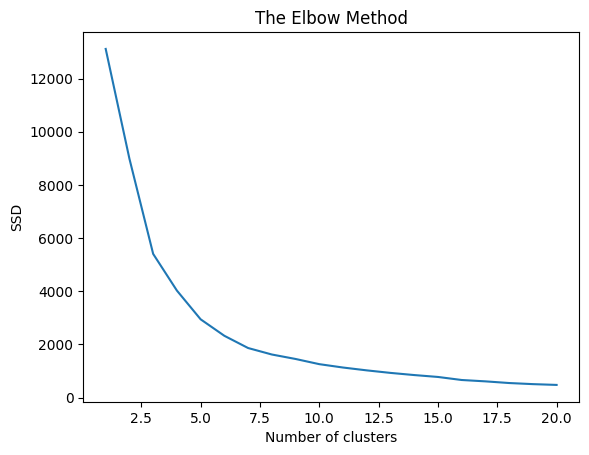

In [88]:
ssd =[]

for num_clusters in range(1,21):
    kmeans = KMeans(n_clusters = num_clusters, max_iter=100)
    kmeans.fit(rfm_normalized)

    ssd.append(kmeans.inertia_)
plt.plot(range(1,21), ssd)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

In [89]:
rfm_normalized.head()

,0,1,2
0,-0.230420,-0.392056,2.322023
1,0.294055,0.393293,-0.893733
2,-0.011717,-0.265527,-0.169196
3,-0.016547,-0.082279,-0.725005
4,-0.189727,-0.326610,2.163220


In [90]:
#ssd

In [91]:
#EC_DATA = pd.DataFrame({"n_cluster":range(1,21),"k_means":ssd})

In [92]:
#EC_DATA.head()

In [93]:
# ec = "C:/Users/Naina Dutraj/Downloads/EC_DATA.csv"
# EC_DATA.to_csv(ec)


In [94]:
kmeans = KMeans(n_clusters = 3, max_iter=100)
kmeans.fit(rfm_normalized)

KMeans(max_iter=100, n_clusters=3)

In [95]:
rfm_normalized.loc[:,'CustomerID'] = rfm['CustomerID']
rfm_normalized


,0,1,2,CustomerID
0,-0.230420,-0.392056,2.322023,12346.0
1,0.294055,0.393293,-0.893733,12347.0
2,-0.011717,-0.265527,-0.169196,12348.0
3,-0.016547,-0.082279,-0.725005,12349.0
4,-0.189727,-0.326610,2.163220,12350.0
...,...,...,...,...
4367,-0.208443,-0.357152,1.845615,18280.0
4368,-0.220585,-0.370241,0.882873,18281.0
4369,-0.208929,-0.344062,-0.834182,18282.0
4370,0.018496,2.744979,-0.873883,18283.0


In [96]:
rfm_normalized.columns = ['Monetary','Frequency','Recency','CustomerID']
rfm_normalized.head()

,Monetary,Frequency,Recency,CustomerID
0,-0.230420,-0.392056,2.322023,12346.0
1,0.294055,0.393293,-0.893733,12347.0
2,-0.011717,-0.265527,-0.169196,12348.0
3,-0.016547,-0.082279,-0.725005,12349.0
4,-0.189727,-0.326610,2.163220,12350.0


In [97]:
rfm_normalized['cluster'] = kmeans.labels_
rfm_normalized

,Monetary,Frequency,Recency,CustomerID,cluster
0,-0.230420,-0.392056,2.322023,12346.0,2
1,0.294055,0.393293,-0.893733,12347.0,0
2,-0.011717,-0.265527,-0.169196,12348.0,0
3,-0.016547,-0.082279,-0.725005,12349.0,0
4,-0.189727,-0.326610,2.163220,12350.0,2
...,...,...,...,...,...
4367,-0.208443,-0.357152,1.845615,18280.0,2
4368,-0.220585,-0.370241,0.882873,18281.0,2
4369,-0.208929,-0.344062,-0.834182,18282.0,0
4370,0.018496,2.744979,-0.873883,18283.0,0


In [98]:
# rfm['cluster']=kmeans.labels_
# rfm

In [99]:
# rfm2 ="C:/Users/Naina Dutraj/Downloads/rf.csv"
# rfm.to_csv(rfm2)


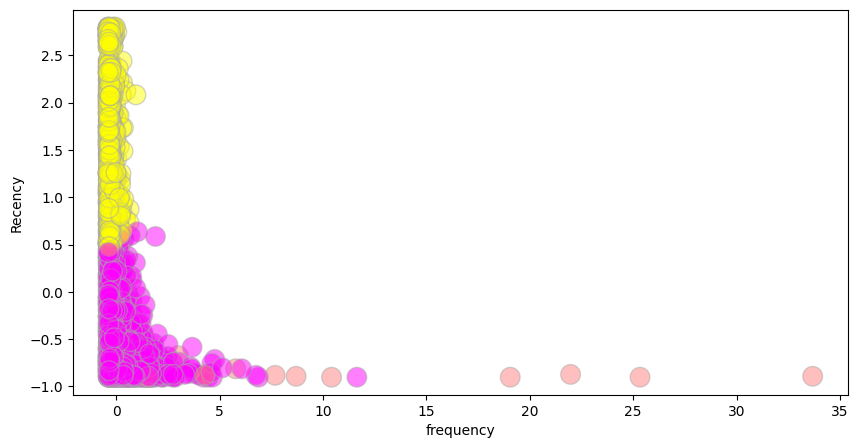

In [100]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(rfm_normalized['Frequency'],rfm_normalized['Recency'],
           c=rfm_normalized['cluster'],
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
plt.xlabel("frequency")
plt.ylabel("Recency")
plt.show()

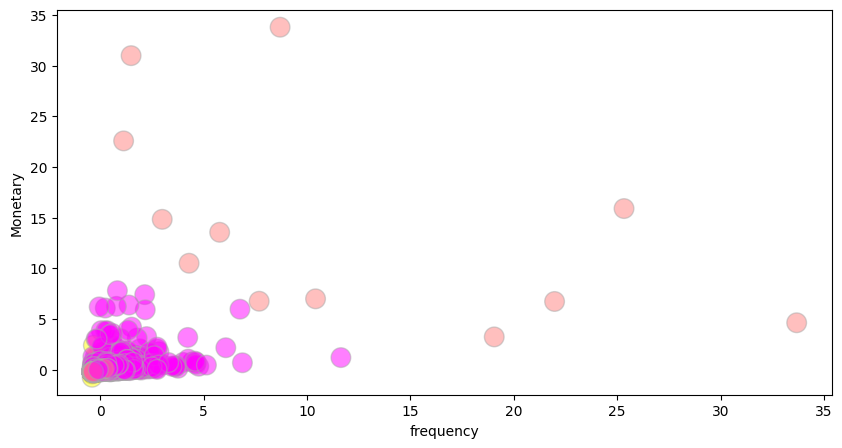

In [101]:
plt.scatter(rfm_normalized['Frequency'],rfm_normalized['Monetary'],
           c=rfm_normalized['cluster'],
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
plt.xlabel("frequency")
plt.ylabel("Monetary")
plt.show()

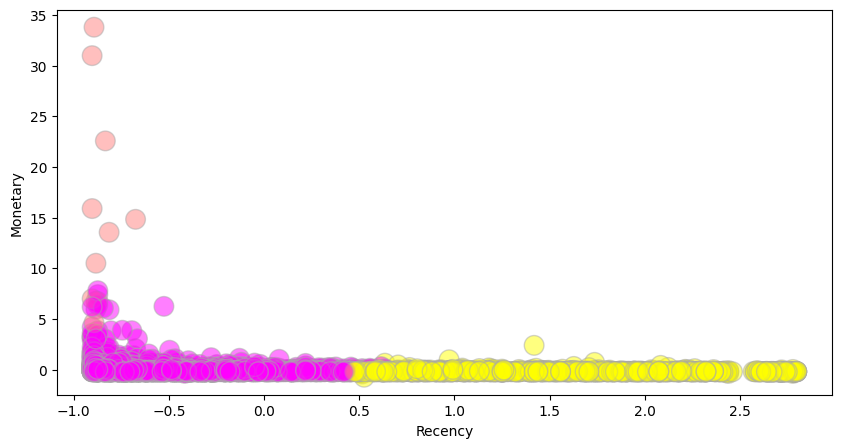

In [102]:
plt.scatter(rfm_normalized['Recency'],rfm_normalized['Monetary'],
           c=rfm_normalized['cluster'],
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

C:\Users\Naina Dutraj\AppData\Local\Temp\ipykernel_19264\1678968775.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,


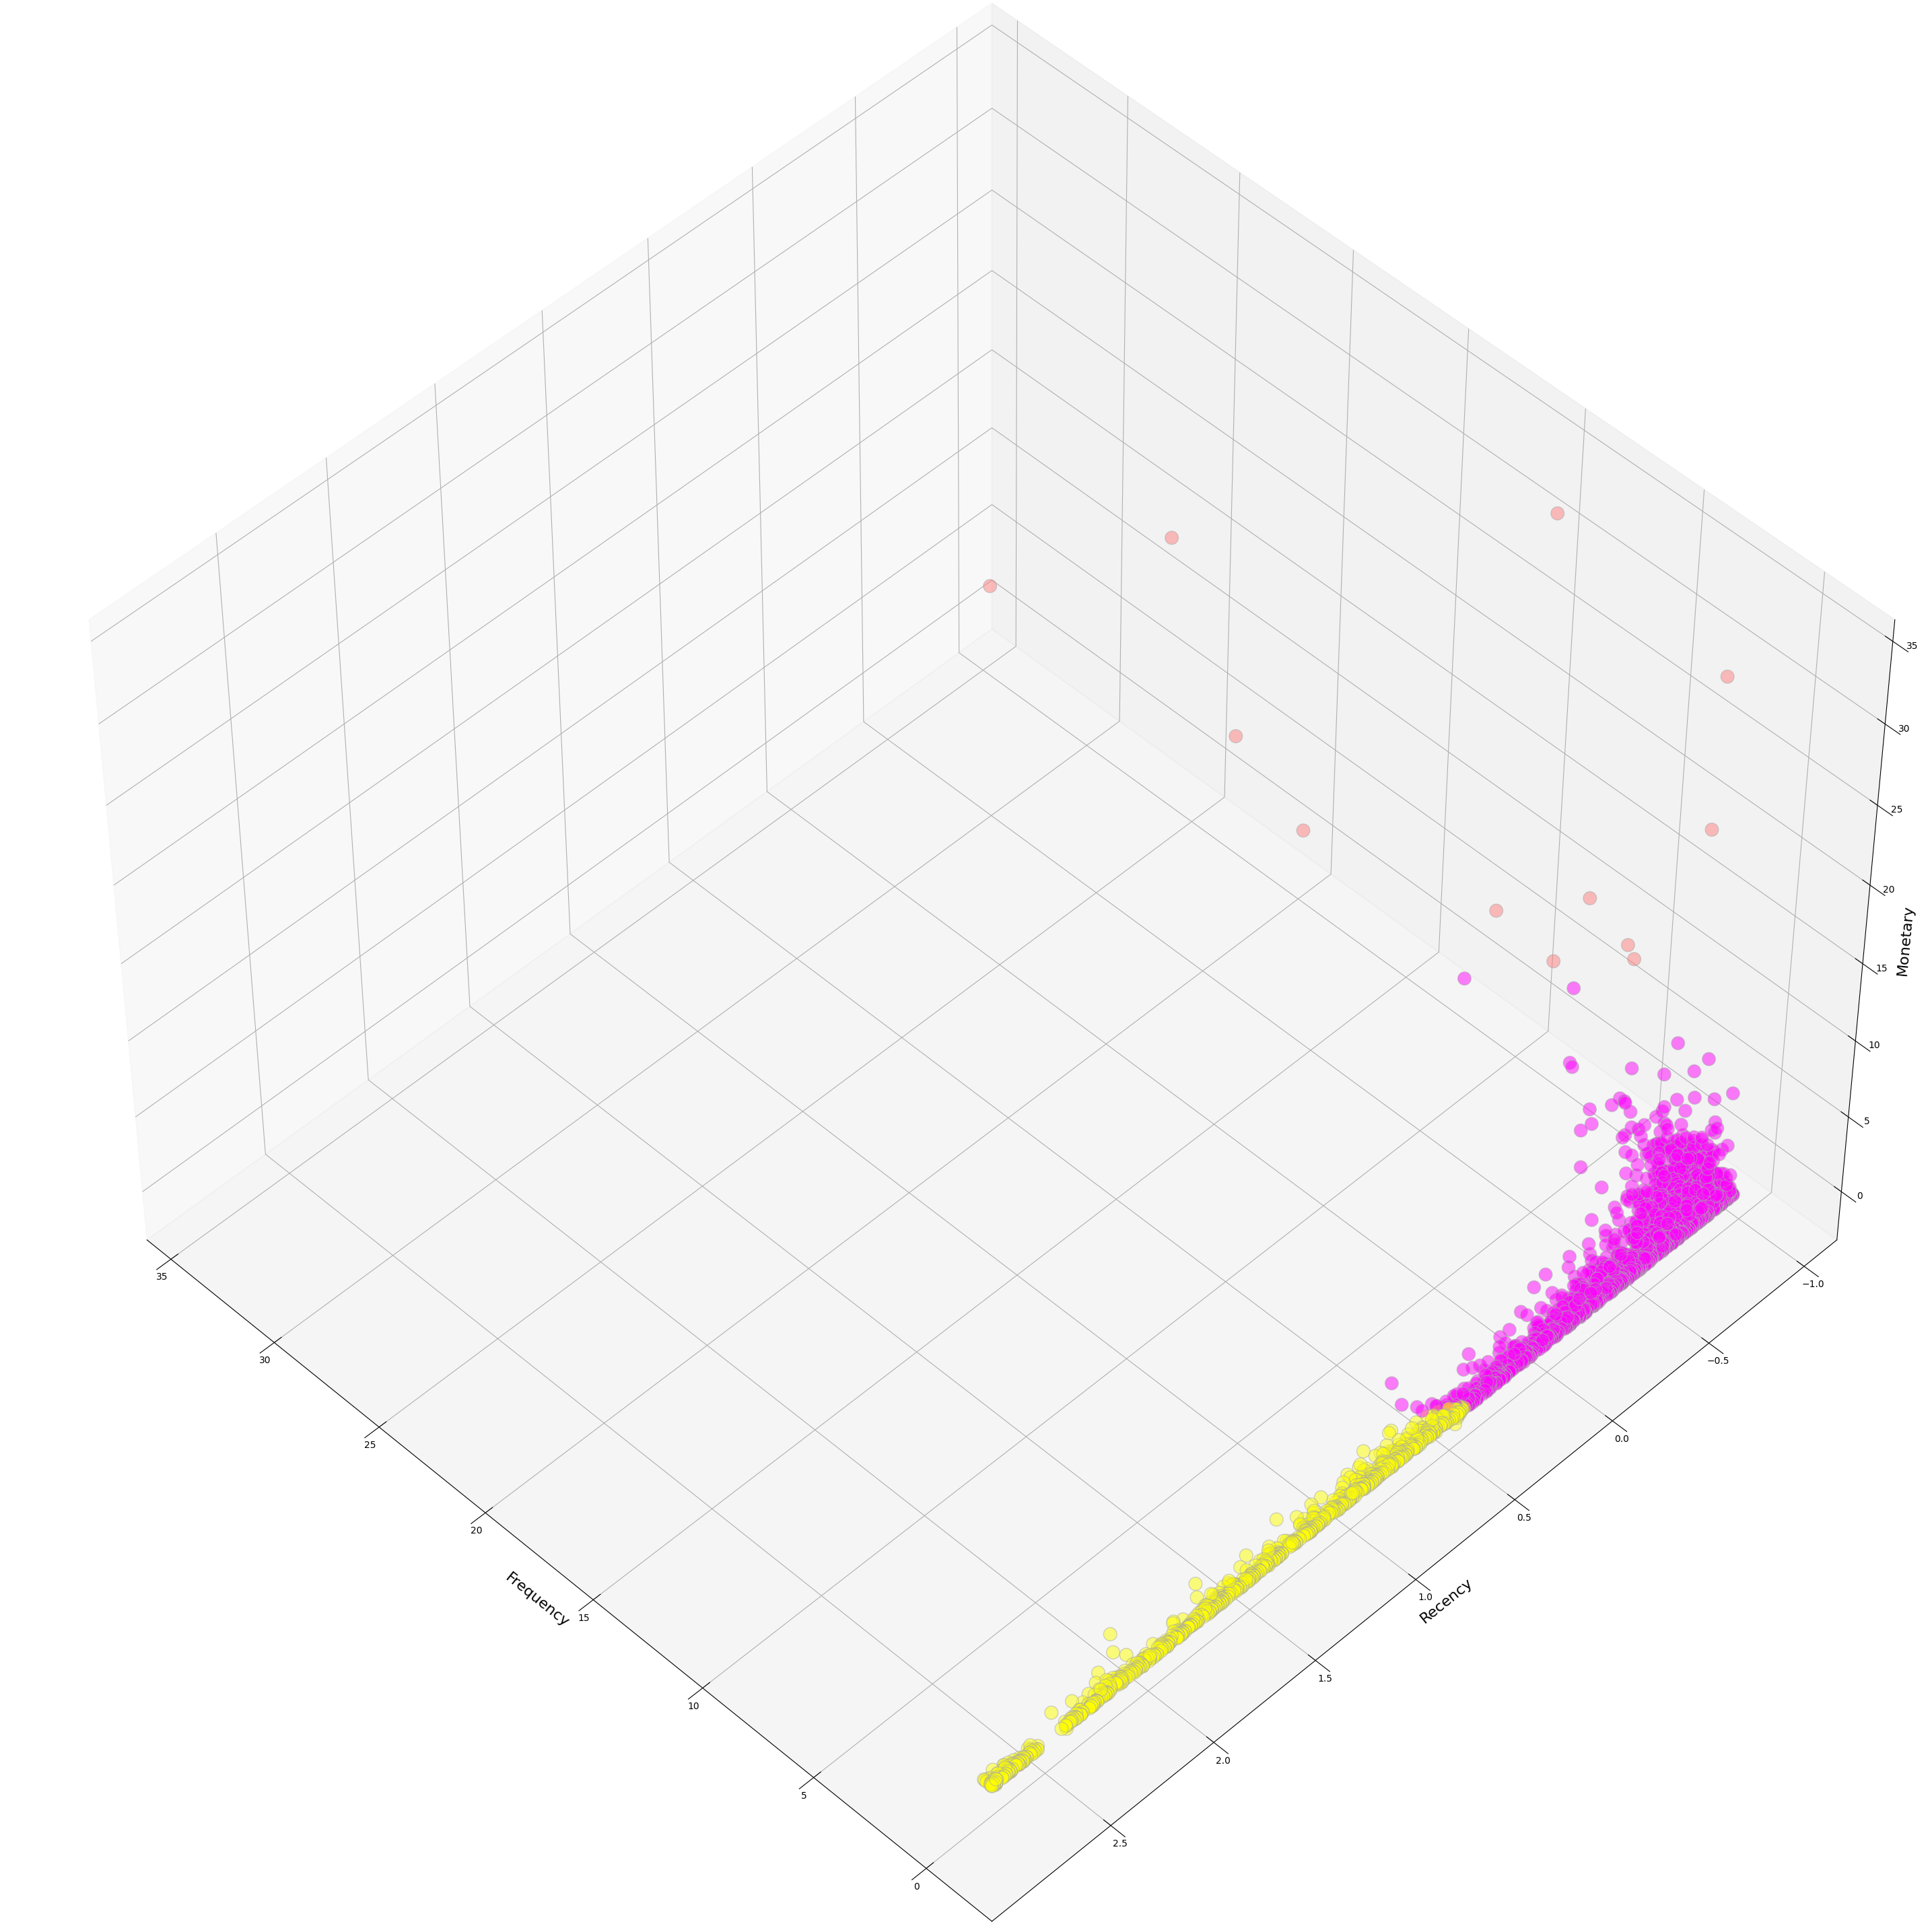

In [103]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (30,30)
fig = plt.figure(1)

plt.clf()
ax=Axes3D(fig,
          rect=[0,0,.95,1],
          elev=48,
          azim=135)
plt.cla()
ax.scatter(rfm_normalized['Frequency'],rfm_normalized['Recency'],rfm_normalized['Monetary'],
           c=rfm_normalized['cluster'],
           s=200,
           cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
ax.set_xlabel('Frequency',
             fontsize = 16)
ax.set_ylabel('Recency',
             fontsize = 16)
ax.set_zlabel('Monetary',
             fontsize = 16)

plt.show()